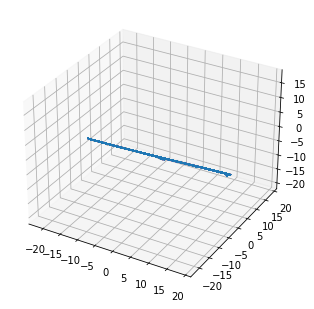

In [11]:
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot

# Create a new plot
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)

# Load the STL files and add the vectors to the plot
your_mesh = mesh.Mesh.from_file('cantilever.stl')
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))

# Auto scale to the mesh size
scale = your_mesh.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()
print(your_mesh)

In [13]:
len(your_mesh.get_unit_normals())

array([[ 0.9635505 ,  0.16053042, -0.21401022],
       [ 0.95496804,  0.11883167, -0.27187344],
       [ 0.4861111 , -0.00817575, -0.8738588 ],
       ...,
       [ 0.15377688,  0.90687007,  0.39235118],
       [ 0.21359818,  0.05839342,  0.97517484],
       [ 0.57455176,  0.53833437,  0.61651146]], dtype=float32)

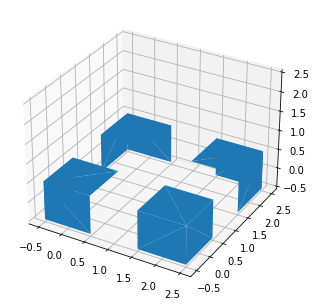

In [10]:
from stl import mesh
import math
import numpy

# Create 3 faces of a cube
data = numpy.zeros(6, dtype=mesh.Mesh.dtype)

# Top of the cube
data['vectors'][0] = numpy.array([[0, 1, 1],
                                  [1, 0, 1],
                                  [0, 0, 1]])
data['vectors'][1] = numpy.array([[1, 0, 1],
                                  [0, 1, 1],
                                  [1, 1, 1]])
# Front face
data['vectors'][2] = numpy.array([[1, 0, 0],
                                  [1, 0, 1],
                                  [1, 1, 0]])
data['vectors'][3] = numpy.array([[1, 1, 1],
                                  [1, 0, 1],
                                  [1, 1, 0]])
# Left face
data['vectors'][4] = numpy.array([[0, 0, 0],
                                  [1, 0, 0],
                                  [1, 0, 1]])
data['vectors'][5] = numpy.array([[0, 0, 0],
                                  [0, 0, 1],
                                  [1, 0, 1]])

# Since the cube faces are from 0 to 1 we can move it to the middle by
# substracting .5
data['vectors'] -= .5

# Generate 4 different meshes so we can rotate them later
meshes = [mesh.Mesh(data.copy()) for _ in range(4)]

# Rotate 90 degrees over the Y axis
meshes[0].rotate([0.0, 0.5, 0.0], math.radians(90))

# Translate 2 points over the X axis
meshes[1].x += 2

# Rotate 90 degrees over the X axis
meshes[2].rotate([0.5, 0.0, 0.0], math.radians(90))
# Translate 2 points over the X and Y points
meshes[2].x += 2
meshes[2].y += 2

# Rotate 90 degrees over the X and Y axis
meshes[3].rotate([0.5, 0.0, 0.0], math.radians(90))
meshes[3].rotate([0.0, 0.5, 0.0], math.radians(90))
# Translate 2 points over the Y axis
meshes[3].y += 2


# Optionally render the rotated cube faces
from matplotlib import pyplot
from mpl_toolkits import mplot3d

# Create a new plot
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)

# Render the cube faces
for m in meshes:
    axes.add_collection3d(mplot3d.art3d.Poly3DCollection(m.vectors))

# Auto scale to the mesh size
scale = numpy.concatenate([m.points for m in meshes]).flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

In [9]:
volume, cog, inertia = your_mesh.get_mass_properties()
print("Volume                                  = {0}".format(volume))
print("Position of the center of gravity (COG) = {0}".format(cog))
print("Inertia matrix at expressed at the COG  = {0}".format(inertia[0,:]))
print("                                          {0}".format(inertia[1,:]))
print("                                          {0}".format(inertia[2,:]))

Your mesh is not closed, the mass methods will not function
            correctly on this mesh.  For more info:
            https://github.com/WoLpH/numpy-stl/issues/69


Volume                                  = 2.182432338915152
Position of the center of gravity (COG) = [-34.55043522  -0.36550205 -20.22097377]
Inertia matrix at expressed at the COG  = [-637.72188693   14.08213915 1336.92073528]
                                          [   14.08213915 -2772.43207467    11.46268562]
                                          [ 1336.92073528    11.46268562 -2128.52188992]
